In [2]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
dataset = pd.read_csv('/kaggle/input/penguins-cleaned/penguins_cleaned.csv')

In [4]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [5]:
x = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [6]:
x.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181,3750
1,39.5,17.4,186,3800
2,40.3,18.0,195,3250
3,36.7,19.3,193,3450
4,39.3,20.6,190,3650


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

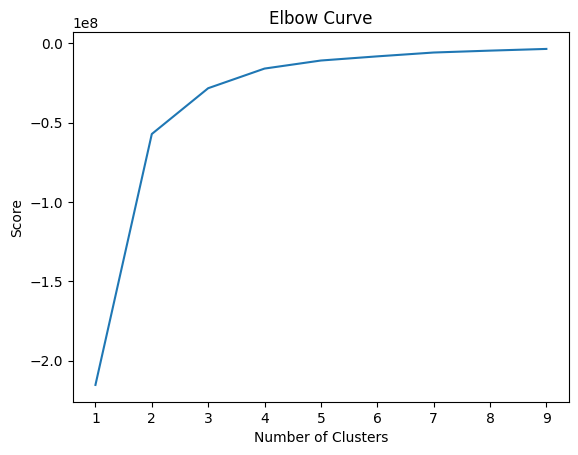

In [7]:
Nc = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [8]:
model = KMeans(n_clusters = 3)


In [9]:
model.fit(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
model.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [11]:
colormap = np.array(['Red', 'Blue', 'Green'])

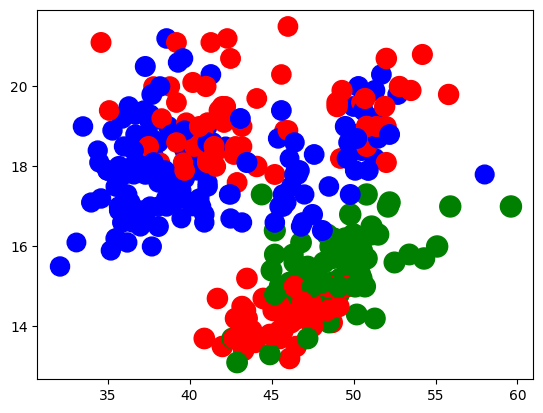

In [12]:
z = plt.scatter(x.bill_length_mm, x.bill_depth_mm, x.flipper_length_mm,c = colormap[model.labels_])

K-Nearest Neighbors

In [13]:
dataset.head()  

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [14]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 0].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [16]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Optimal K Value

In [25]:
from math import sqrt
error = []
n = int(sqrt(len(X)))
# Calculating error for K values between 1 and 40
for i in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [26]:

optimal_k_index = np.argmin(error)

optimal_k = optimal_k_index + 1 

print(f"Optimal K value: {optimal_k}")

Optimal K value: 3


Text(0, 0.5, 'Mean Error')

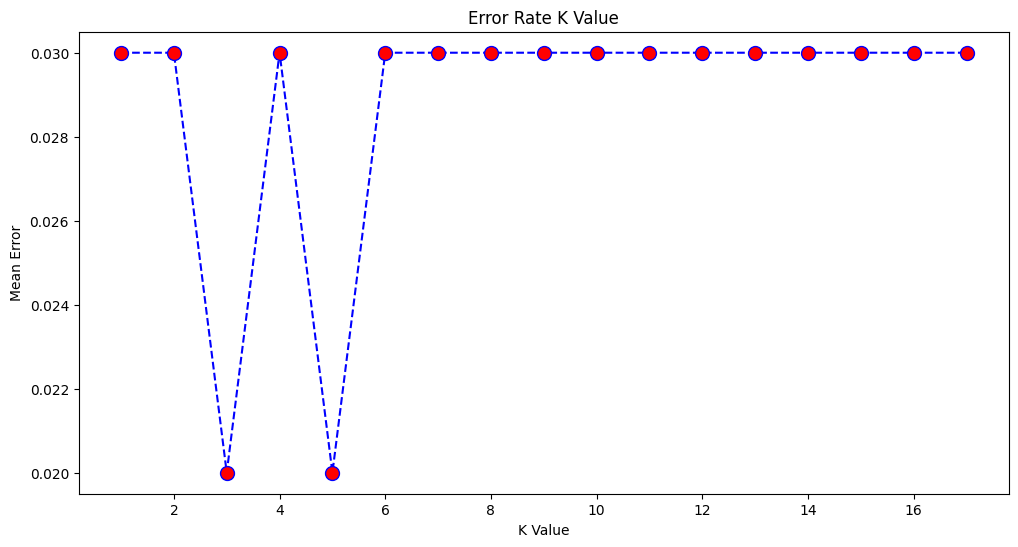

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, n), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Taking accuracy as parameter to calculate the optimal K- value.

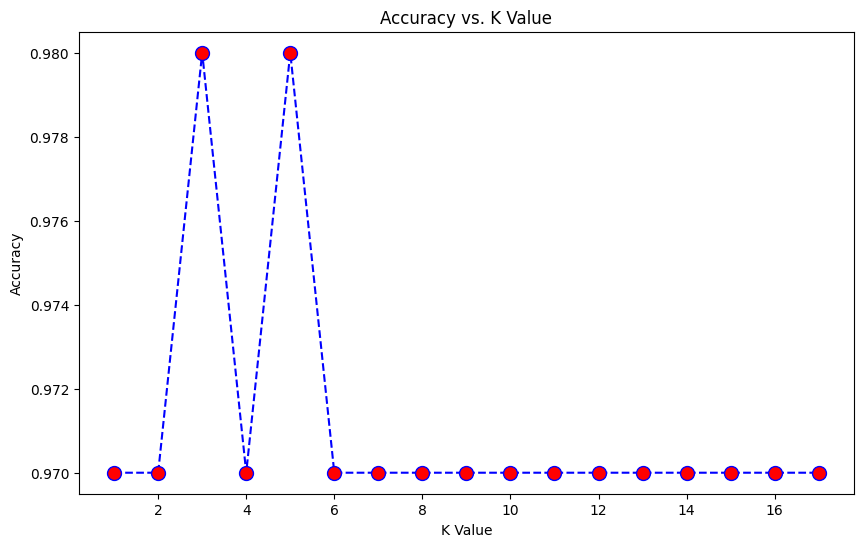

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []
for i in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred_i))

# Plotting accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1, n), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[48  0  0]
 [ 2 21  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



## Euclidean, Manhattan and Minkowski distance


In [23]:
from scipy.spatial.distance import pdist, squareform

# Extract the feature columns
features = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Calculate Euclidean distance
euclidean_dist = pdist(features, metric='euclidean')

# Calculate Manhattan distance
manhattan_dist = pdist(features, metric='cityblock')

# Calculate Minkowski distance with p=3 (you can change p to any other value)
minkowski_dist = pdist(features, metric='minkowski', p=3)

# Convert pairwise distances to square form for better interpretation
euclidean_dist_matrix = squareform(euclidean_dist)
manhattan_dist_matrix = squareform(manhattan_dist)
minkowski_dist_matrix = squareform(minkowski_dist)

In [24]:
print(euclidean_dist_matrix)


[[  0.          50.26778292 500.19789084 ...  29.65636525 351.39433689
   32.20574483]
 [ 50.26778292   0.         550.0745404  ...  27.86844093 301.17478314
   29.75197472]
 [500.19789084 550.0745404    0.         ... 525.08621197 850.19777111
  525.10237097]
 ...
 [ 29.65636525  27.86844093 525.08621197 ...   0.         325.44750729
    5.06063237]
 [351.39433689 301.17478314 850.19777111 ... 325.44750729   0.
  325.22215484]
 [ 32.20574483  29.75197472 525.10237097 ...   5.06063237 325.22215484
    0.        ]]


In [25]:
print(manhattan_dist_matrix)

[[  0.   56.7 515.9 ...  48.  391.   53.1]
 [ 56.7   0.  560.4 ...  42.9 336.9  49. ]
 [515.9 560.4   0.  ... 536.5 876.5 538.6]
 ...
 [ 48.   42.9 536.5 ...   0.  344.    6.1]
 [391.  336.9 876.5 ... 344.    0.  337.9]
 [ 53.1  49.  538.6 ...   6.1 337.9   0. ]]


In [26]:
print(minkowski_dist_matrix)

[[  0.          50.01696238 500.0036614  ...  26.45298416 350.07070854
   27.98027139]
 [ 50.01696238   0.         550.00080411 ...  25.71221744 300.05654857
   26.48604463]
 [500.0036614  550.00080411   0.         ... 525.00098245 850.00209163
  525.00120652]
 ...
 [ 26.45298416  25.71221744 525.00098245 ...   0.         325.01551087
    5.00454254]
 [350.07070854 300.05654857 850.00209163 ... 325.01551087   0.
  325.00545393]
 [ 27.98027139  26.48604463 525.00120652 ...   5.00454254 325.00545393
    0.        ]]


## Train and test accuracy

In [27]:
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9871244635193133
Test Accuracy: 0.98


## Regression done for body_mass_g by taking bill_length_mm, bill_depth_mm and flipper_length_mm as basis


Optimal K value for Regression: 7
Mean Squared Error (MSE): 92699.36224489799
R-squared (R2) Score: 0.827627387639947


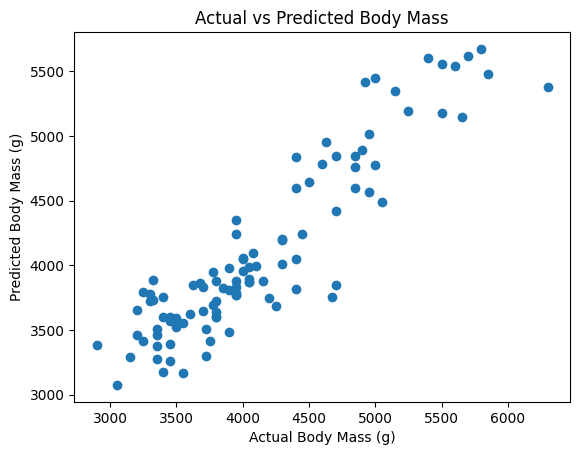

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('/kaggle/input/penguins-cleaned/penguins_cleaned.csv')

# Select features and target variable for regression
X_reg = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y_reg = dataset['body_mass_g']

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.30, random_state=42)

# Feature Scaling
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Find the optimal value for K (similar to classification)
error_reg = []
for i in range(1, 40):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train_reg, y_train_reg)
    pred_i_reg = knn_reg.predict(X_test_reg)
    error_reg.append(np.sqrt(mean_squared_error(y_test_reg, pred_i_reg)))

optimal_k_index_reg = np.argmin(error_reg)
optimal_k_reg = optimal_k_index_reg + 1
print(f"Optimal K value for Regression: {optimal_k_reg}")

# Train the KNN regressor with optimal K
regressor = KNeighborsRegressor(n_neighbors=optimal_k_reg)
regressor.fit(X_train_reg, y_train_reg)

# Predictions and evaluation
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Plot the actual vs predicted values
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")
plt.title("Actual vs Predicted Body Mass")
plt.show()

